In [23]:
import re
import os
from collections import Counter

# Custom stop words
custom_stop_words = ['chekalinsky','grisha','nadya','lenka','valera','zhora','andrei','hed','alyosha','kolya','marisha','serge','ivan','ylim','obrtyshev','masha','martinych','martin','marek','katia','mur','fyodorovna','hermann','lizaveta','anisya','marfutka','tanya','godard','nika','gregson','gregsons','petrovitch','kovaloff','jakovlevitch','ivanovich','vasiliy','schramm','akakiy','akakievitch','spiridonovich','spiridon','ermolaevich','vova','ermolai','couldnt','wasnt','lukeriya','vanka','gurov','anna','sergeyevna','varka','bayu','pelageya','olga','meschersky','pani','eliza','romuald','pan','apolek','jamila','daniyar','didnt', 'thats', 'oh', 'im', 'hes', 'shes', 'began', 'came', 'm', 'bu', 'o', 'went','let', 'dont','like', 'said', 'come', 'call', 'upon', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except', 'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even']

# Define the directory containing text files
directory = os.getcwd()

# Create a dictionary to store the stories
stories = {}

# Read each text file and store its content in the dictionary
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            story_text = file.read()
            stories[filename] = story_text

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


def remove_custom_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the preprocessing function to each story
cleaned_stories = {filename: remove_custom_stop_words(preprocess(story), custom_stop_words) for filename, story in stories.items()}

In [24]:
# Find the Most Common Words
def find_most_common_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(n)
    return most_common_words

common_words_in_stories = {filename: find_most_common_words(story) for filename, story in cleaned_stories.items()}

# Print the most common words in a formatted manner
for filename, common_words in common_words_in_stories.items():
    print(f"\nMost common words in {filename}:")
    print("=" * (len(filename) + 22))
    for word, count in common_words:
        print(f"{word}: {count}")


Most common words in Aitmatov, “Jamila”.txt:
horses: 49
mother: 45
eyes: 39
village: 38
head: 36
trap: 34
time: 33
long: 32
steppe: 31
away: 28

Most common words in Babel, “Crossing the River Zbrucz”.txt:
commander: 4
head: 4
floor: 4
sixth: 3
division: 3
wall: 3
horses: 3
legs: 3
find: 3
woman: 3

Most common words in Babel, “My First Goose”.txt:
little: 9
cossacks: 7
trunk: 6
division: 5
commander: 5
order: 5
read: 5
quartermaster: 5
lad: 5
comrade: 4

Most common words in Babel, “Pan Apolek”.txt:
man: 10
priest: 9
church: 9
head: 7
novograd: 7
body: 7
blind: 7
men: 6
thin: 6
pink: 6

Most common words in Babel, “The Church in Novgorod”.txt:
church: 7
military: 6
commissar: 4
house: 3
evening: 3
filled: 3
gold: 3
saint: 3
priest: 2
fled: 2

Most common words in Bunin, “Light Breathing”.txt:
eyes: 10
little: 10
headmistress: 9
woman: 9
hair: 8
cross: 7
school: 6
pleasant: 5
town: 5
cold: 5

Most common words in Bunin, “Sunstroke”.txt:
town: 12
room: 10
thought: 10
lieutenant: 9
hot:

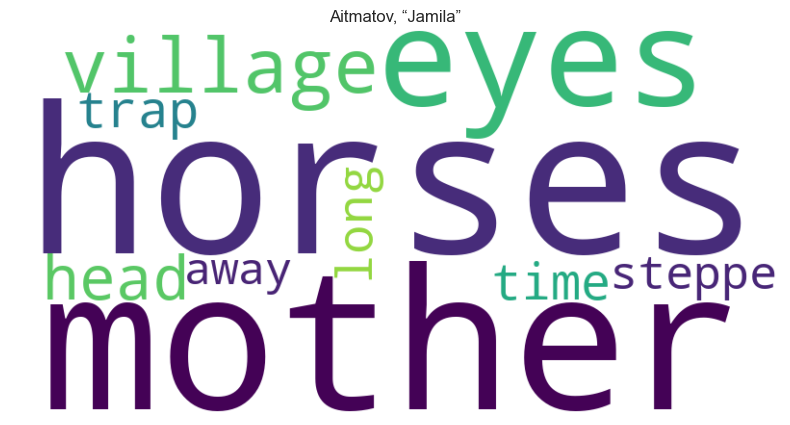

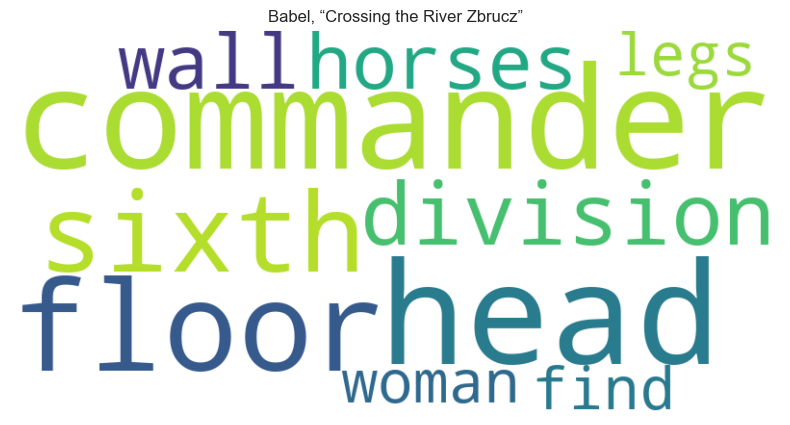

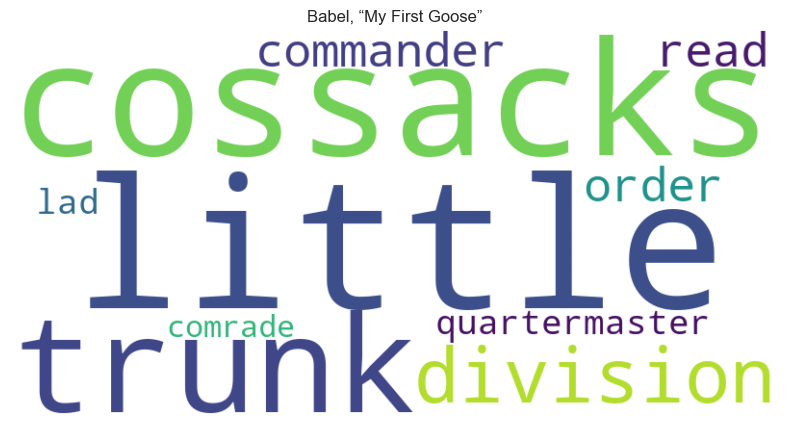

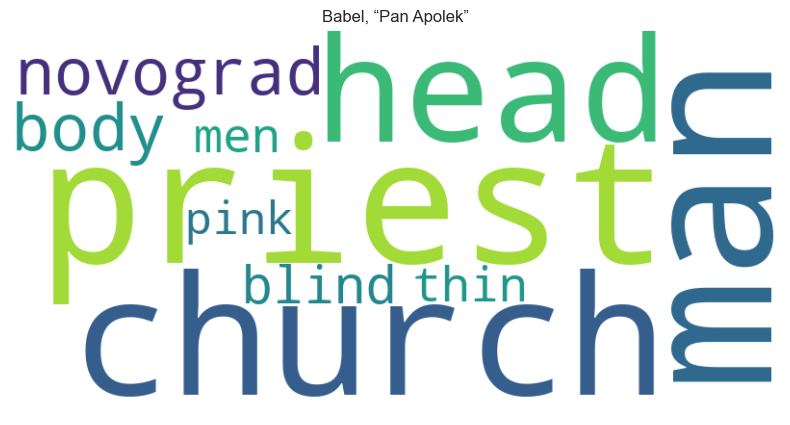

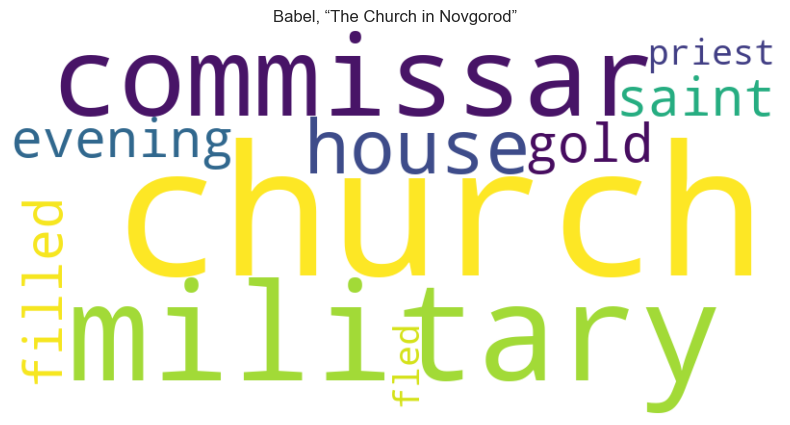

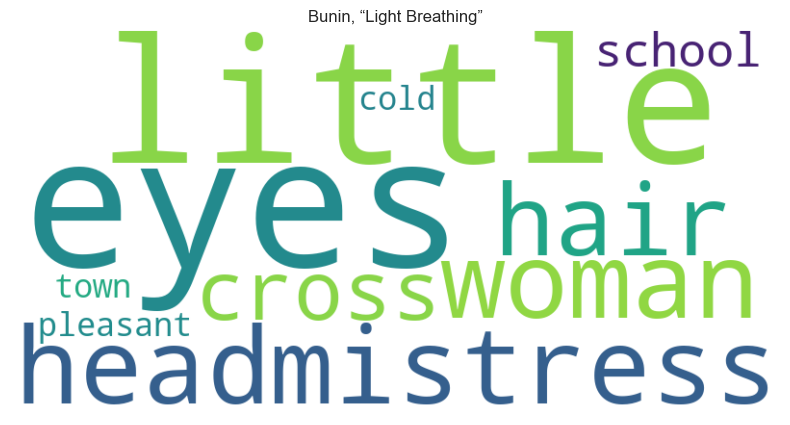

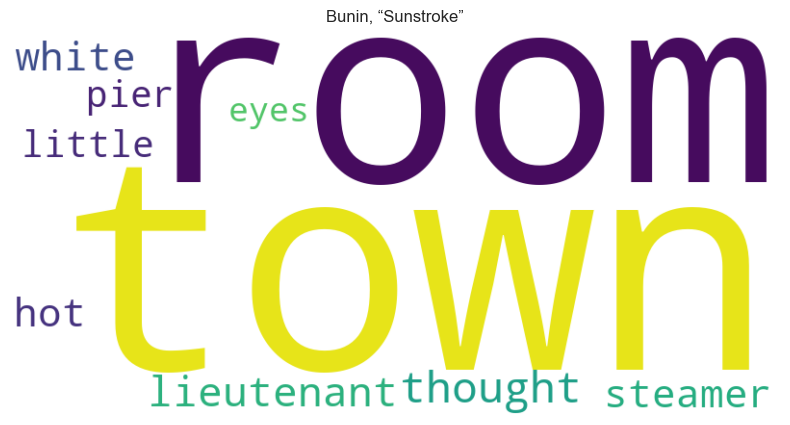

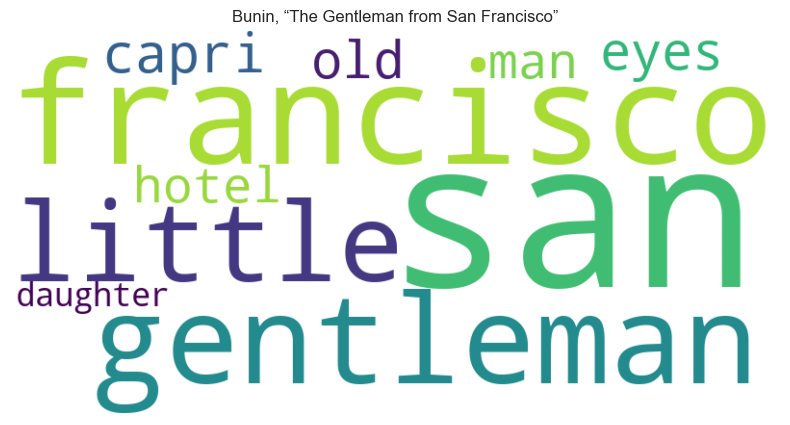

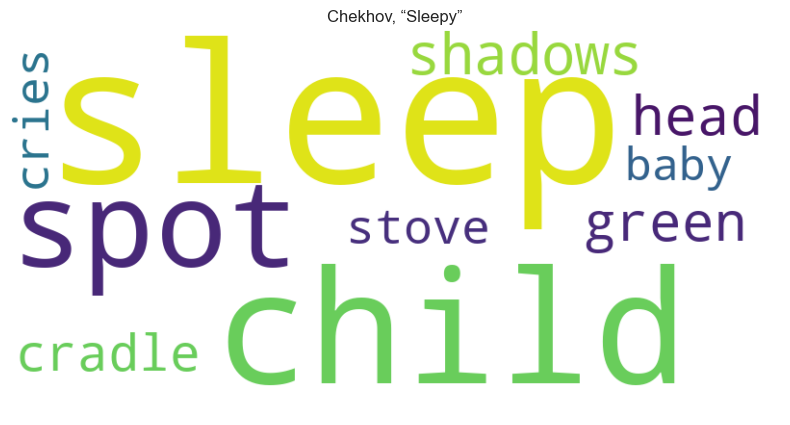

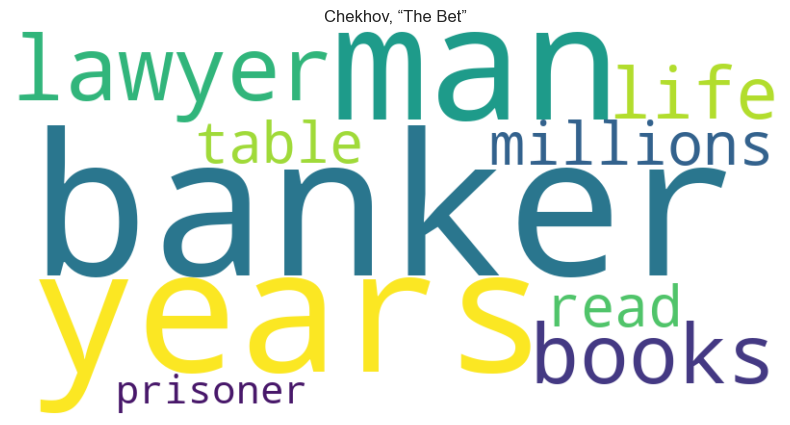

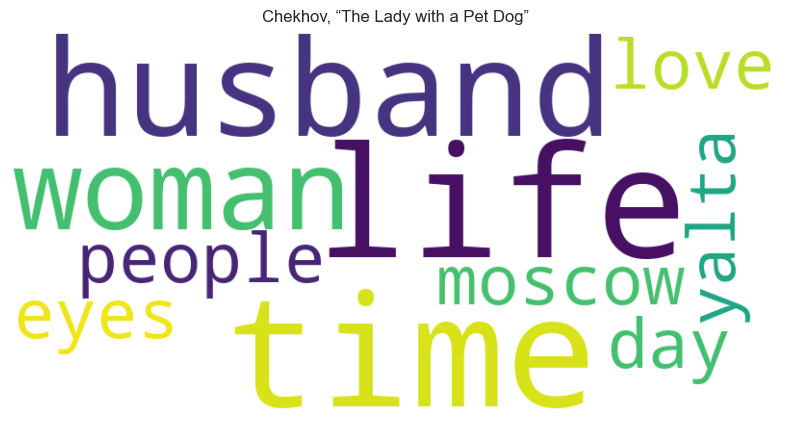

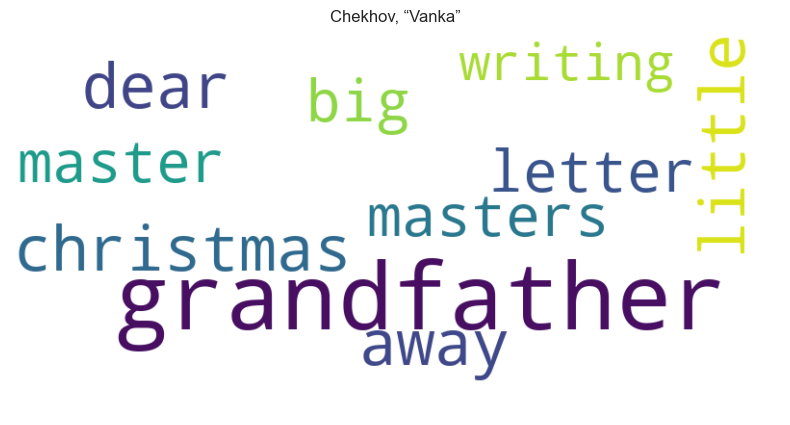

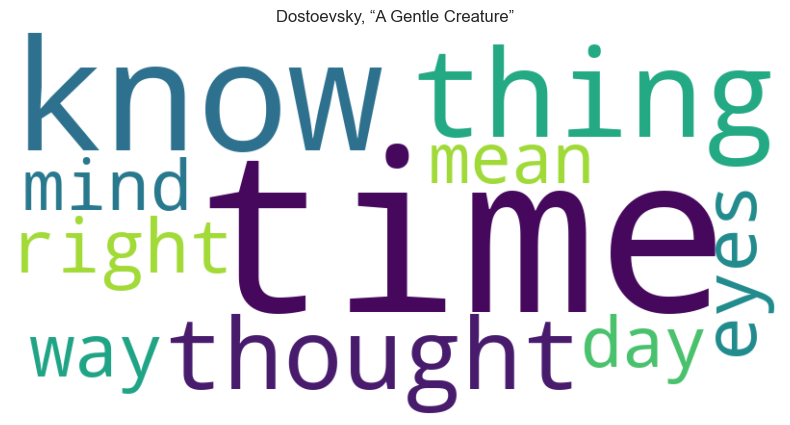

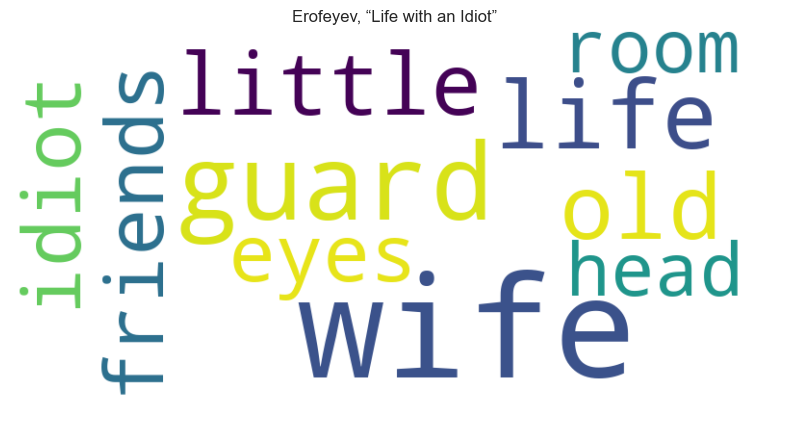

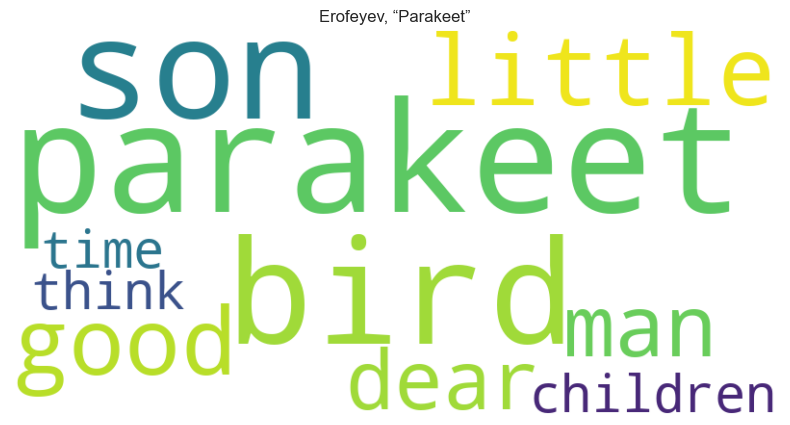

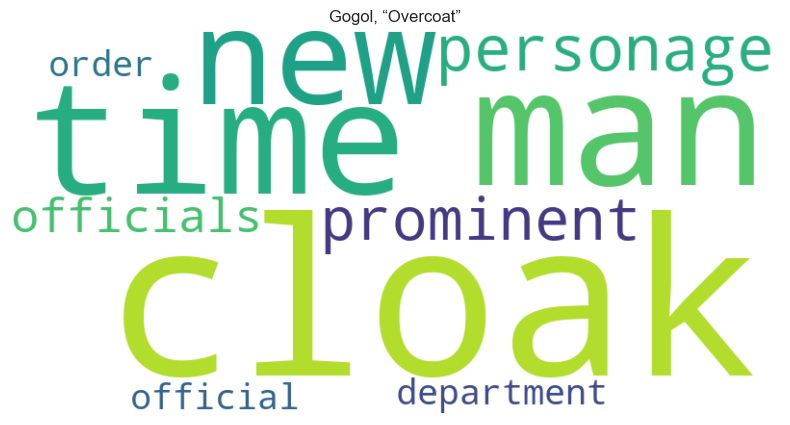

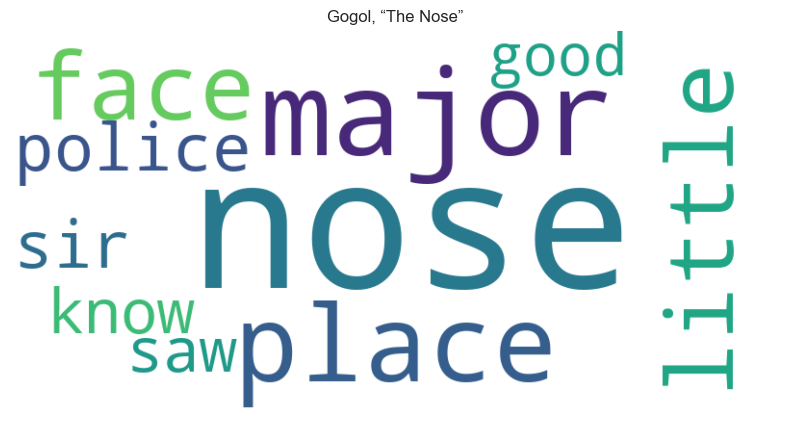

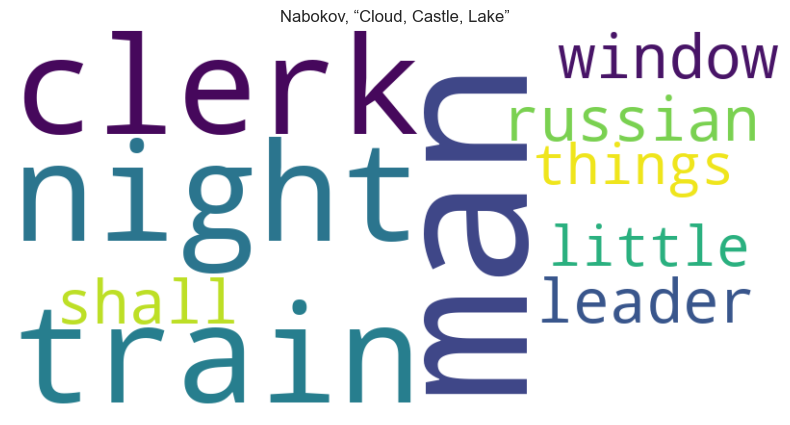

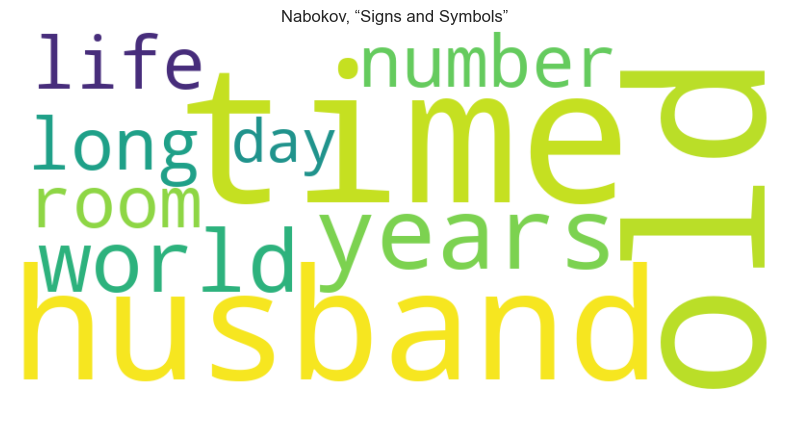

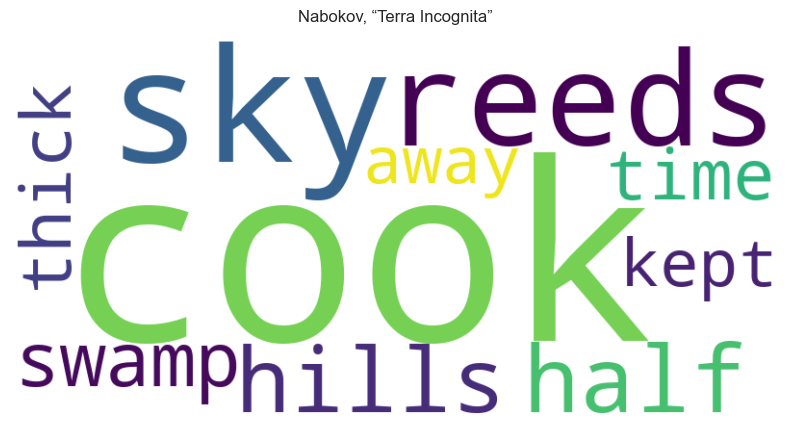

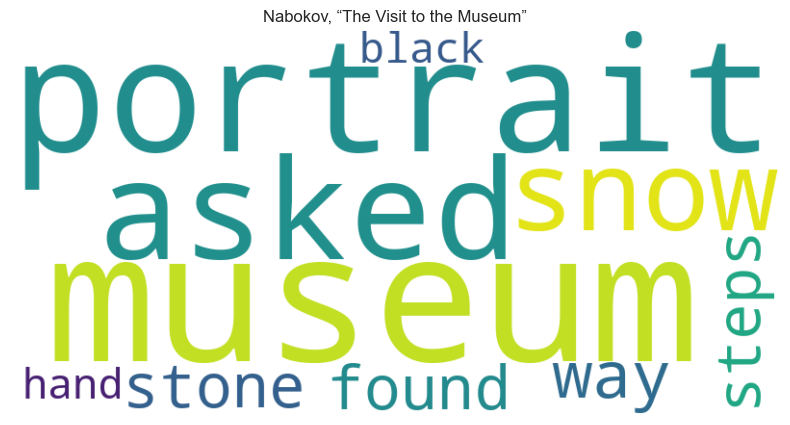

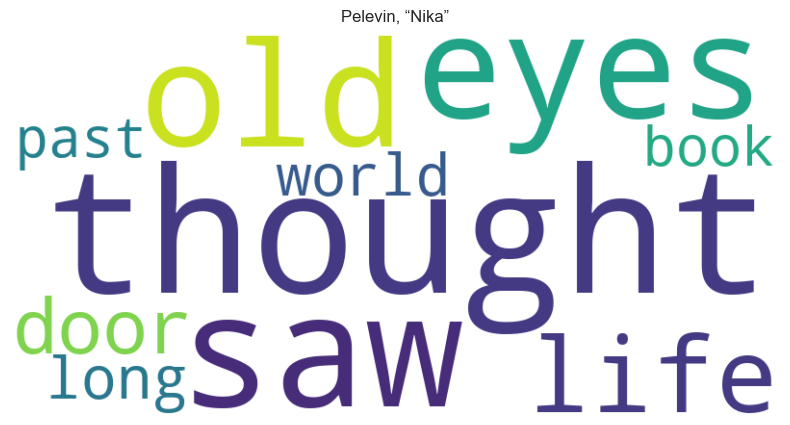

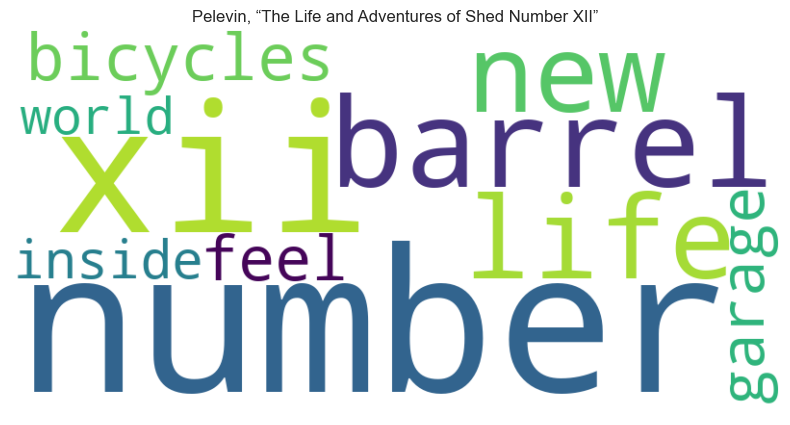

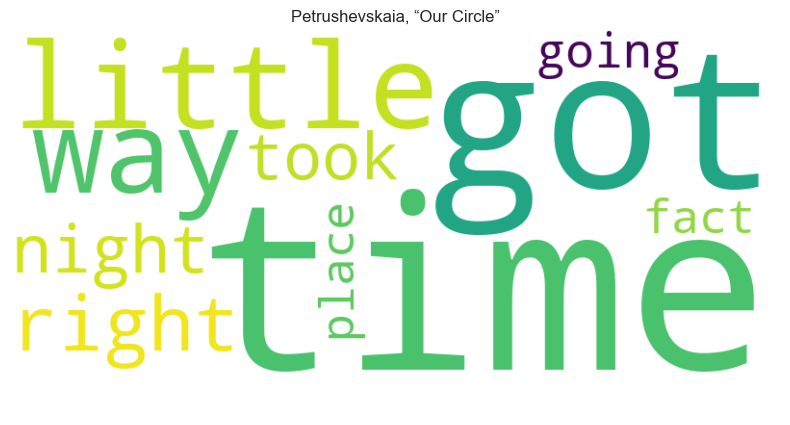

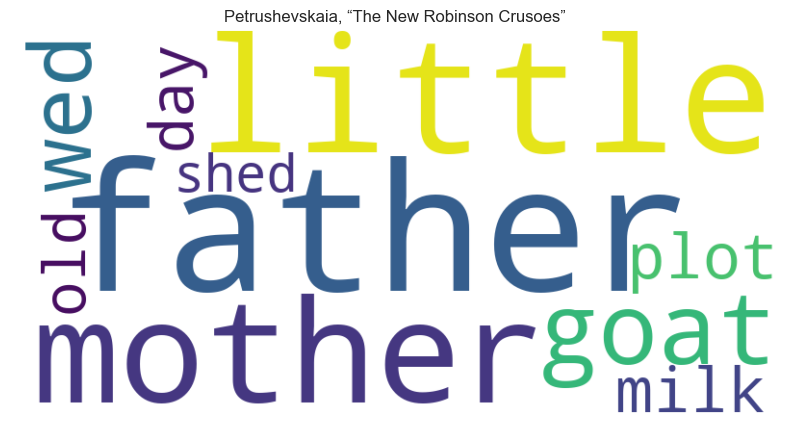

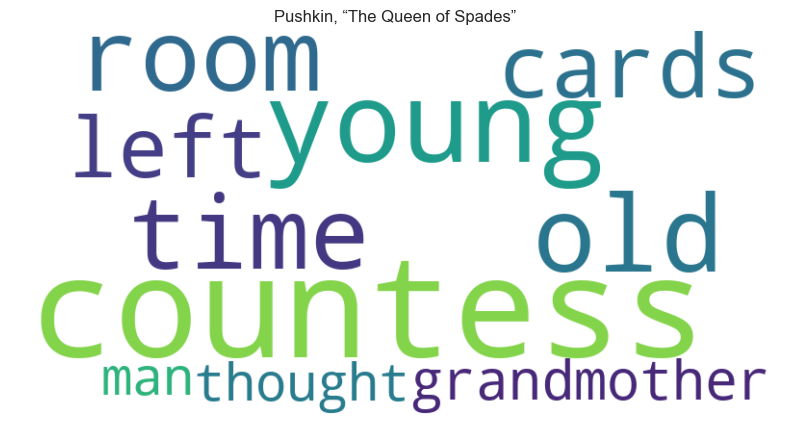

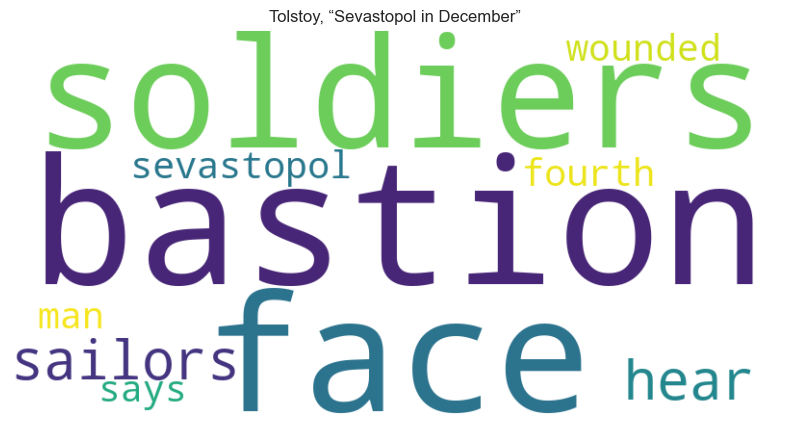

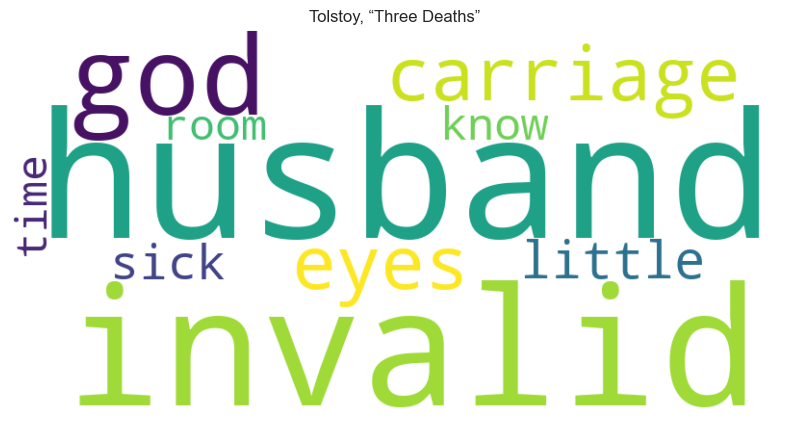

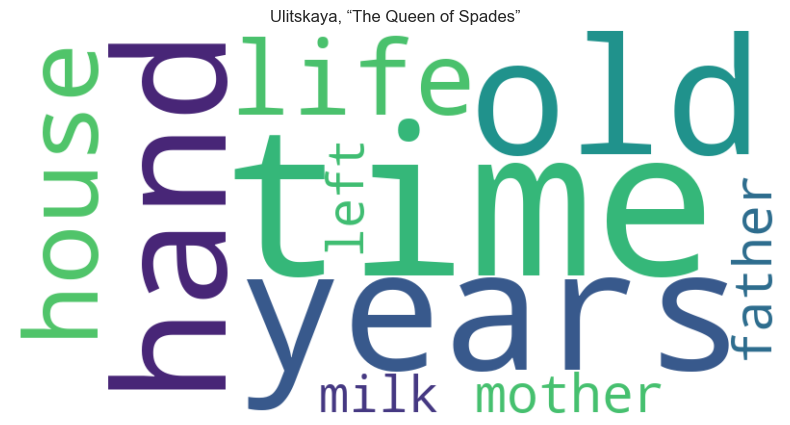

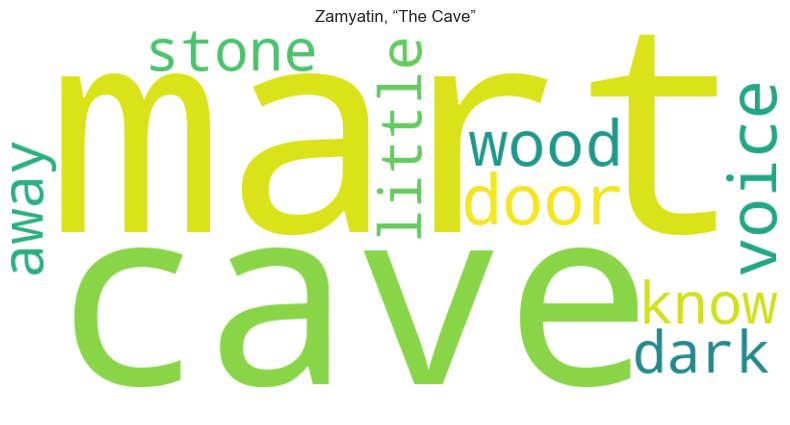

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(common_words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plot the word cloud for each story
for filename, common_words in common_words_in_stories.items():
    title = filename.split('.')[0]
    plot_word_cloud(dict(common_words), title)

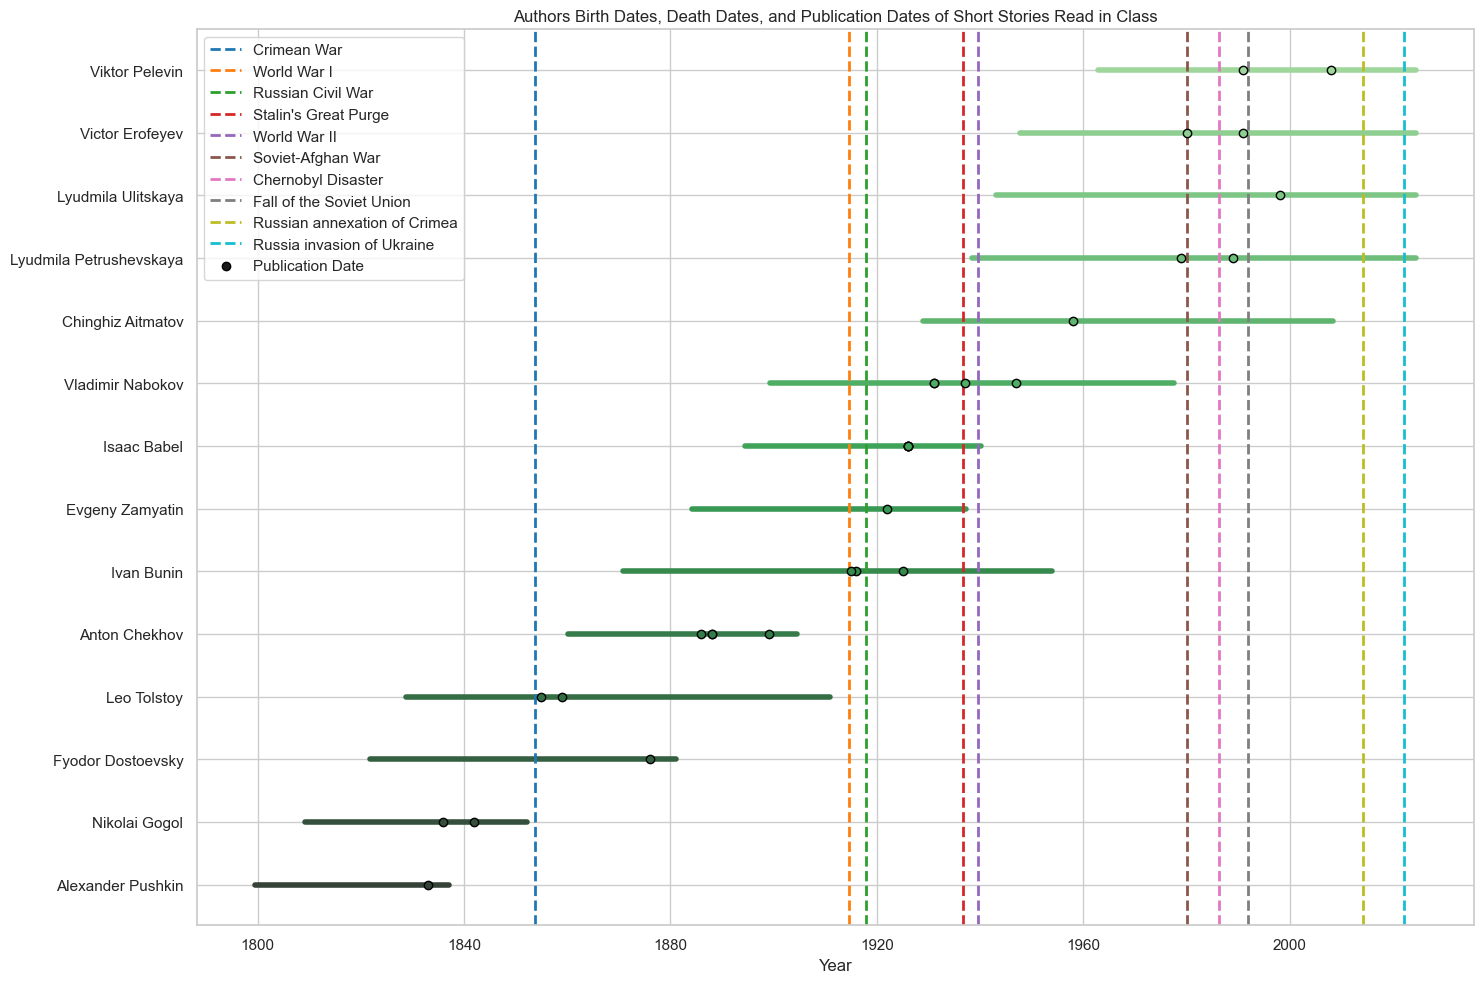

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# List of authors with their birth and death dates
authors = [
    {"name": "Isaac Babel", "birth_date": "1894-07-13", "death_date": "1940-01-27"},
    {"name": "Vladimir Nabokov", "birth_date": "1899-04-22", "death_date": "1977-07-02"},
    {"name": "Evgeny Zamyatin", "birth_date": "1884-02-01", "death_date": "1937-03-10"},
    {"name": "Anton Chekhov", "birth_date": "1860-01-29", "death_date": "1904-07-15"},
    {"name": "Ivan Bunin", "birth_date": "1870-10-22", "death_date": "1953-11-08"},
    {"name": "Fyodor Dostoevsky", "birth_date": "1821-11-11", "death_date": "1881-02-09"},
    {"name": "Victor Erofeyev", "birth_date": "1947-09-19", "death_date": None},
    {"name": "Nikolai Gogol", "birth_date": "1809-04-01", "death_date": "1852-02-21"},
    {"name": "Viktor Pelevin", "birth_date": "1962-11-22", "death_date": None},
    {"name": "Lyudmila Petrushevskaya", "birth_date": "1938-05-26", "death_date": None},
    {"name": "Alexander Pushkin", "birth_date": "1799-06-06", "death_date": "1837-02-10"},
    {"name": "Leo Tolstoy", "birth_date": "1828-09-09", "death_date": "1910-11-20"},
    {"name": "Chinghiz Aitmatov", "birth_date": "1928-12-12", "death_date": "2008-06-10"},
    {"name": "Lyudmila Ulitskaya", "birth_date": "1943-02-21", "death_date": None}
]

# List of stories with their authors and publication dates
stories = [
    {"title": "Jamila", "author": "Chinghiz Aitmatov", "pub_date": "1958"},
    {"title": "Crossing the River Zbrucz", "author": "Isaac Babel", "pub_date": "1926"},
    {"title": "My First Goose", "author": "Isaac Babel", "pub_date": "1926"},
    {"title": "Pan Apolek", "author": "Isaac Babel", "pub_date": "1926"},
    {"title": "The Church in Novgorod", "author": "Isaac Babel", "pub_date": "1926"},
    {"title": "Light Breathing", "author": "Ivan Bunin", "pub_date": "1916"},
    {"title": "Sunstroke", "author": "Ivan Bunin", "pub_date": "1925"},
    {"title": "The Gentleman from San Francisco", "author": "Ivan Bunin", "pub_date": "1915"},
    {"title": "Sleepy", "author": "Anton Chekhov", "pub_date": "1888"},
    {"title": "The Bet", "author": "Anton Chekhov", "pub_date": "1888"},
    {"title": "The Lady with a Pet Dog", "author": "Anton Chekhov", "pub_date": "1899"},
    {"title": "Vanka", "author": "Anton Chekhov", "pub_date": "1886"},
    {"title": "A Gentle Creature", "author": "Fyodor Dostoevsky", "pub_date": "1876"},
    {"title": "Life with an Idiot", "author": "Victor Erofeyev", "pub_date": "1980"},
    {"title": "Parakeet", "author": "Victor Erofeyev", "pub_date": "1991"},
    {"title": "Overcoat", "author": "Nikolai Gogol", "pub_date": "1842"},
    {"title": "The Nose", "author": "Nikolai Gogol", "pub_date": "1836"},
    {"title": "Cloud, Castle, Lake", "author": "Vladimir Nabokov", "pub_date": "1937"},
    {"title": "Signs and Symbols", "author": "Vladimir Nabokov", "pub_date": "1947"},
    {"title": "Terra Incognita", "author": "Vladimir Nabokov", "pub_date": "1931"},
    {"title": "The Visit to the Museum", "author": "Vladimir Nabokov", "pub_date": "1931"},
    {"title": "Nika", "author": "Viktor Pelevin", "pub_date": "2008"},
    {"title": "The Life and Adventures of Shed Number XII", "author": "Viktor Pelevin", "pub_date": "1991"},
    {"title": "Our Circle", "author": "Lyudmila Petrushevskaya", "pub_date": "1979"},
    {"title": "The New Robinson Crusoes", "author": "Lyudmila Petrushevskaya", "pub_date": "1989"},
    {"title": "The Queen of Spades", "author": "Alexander Pushkin", "pub_date": "1833"},
    {"title": "Sevastopol in December", "author": "Leo Tolstoy", "pub_date": "1855"},
    {"title": "Three Deaths", "author": "Leo Tolstoy", "pub_date": "1859"},
    {"title": "The Cave", "author": "Evgeny Zamyatin", "pub_date": "1922"},
    {"title": "The Queen of Spades", "author": "Lyudmila Ulitskaya", "pub_date": "1998"},
]

# Convert string dates to datetime objects
for author in authors:
    author['birth_date'] = datetime.strptime(author['birth_date'], '%Y-%m-%d')
    author['death_date'] = datetime.strptime(author['death_date'], '%Y-%m-%d') if author['death_date'] else None

for story in stories:
    story['pub_date'] = datetime.strptime(story['pub_date'], '%Y')

# Sort authors by birth date and then by death date
authors.sort(key=lambda x: (x['birth_date'], x['death_date'] or datetime.max), reverse=True)

# Historical events in Soviet Union/Russia
historical_events = [
    {"event": "Crimean War", "date": datetime(1853, 10, 5)},
    {"event": "World War I", "date": datetime(1914, 7, 28)},
    {"event": "Russian Civil War", "date": datetime(1917, 11, 7)},
    {"event": "Stalin's Great Purge", "date": datetime(1936, 8, 1)},
    {"event": "World War II", "date": datetime(1939, 9, 1)},
    {"event": "Soviet-Afghan War", "date": datetime(1979, 12, 24)},
    {"event": "Chernobyl Disaster", "date": datetime(1986, 4, 26)},
    {"event": "Fall of the Soviet Union", "date": datetime(1991, 12, 26)},
    {"event": "Russian annexation of Crimea", "date": datetime(2014, 3, 18)},
    {"event": "Russia invasion of Ukraine", "date": datetime(2022, 2, 24)}
]

# Define colors for the historical events
event_colors = sns.color_palette("tab10", len(historical_events))

# Set up the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Define colors for the plots
colors = sns.color_palette("Greens_d", len(authors))

# Plot each author's lifespan and publication dates
for idx, author in enumerate(authors):
    color = colors[idx]
    
    # Plot lifespan
    if author['death_date']:
        plt.plot([author['birth_date'], author['death_date']], [idx, idx], color=color, lw=4)
    else:
        plt.plot([author['birth_date'], datetime.now()], [idx, idx], color=color, lw=4)
    
    # Plot publication dates
    for story in stories:
        if story['author'] == author['name']:
            plt.scatter(story['pub_date'], idx, color=color, edgecolor='black', zorder=5)

# Plot historical events with legend
for idx, event in enumerate(historical_events):
    plt.axvline(event['date'], color=event_colors[idx], linestyle='--', lw=2, label=event['event'])

# Add the hollow circles for publication dates to the legend
plt.scatter([], [], color='k', edgecolor='black', label='Publication Date')
plt.legend()

# Create a legend for historical events
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

# Set the y-axis labels to author names
plt.yticks(range(len(authors)), [author['name'] for author in authors])
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.title('Authors Birth Dates, Death Dates, and Publication Dates of Short Stories Read in Class')

plt.tight_layout()